# Orientación geométrica

Vamos a salir de dudas utilizando la galaxia UGC10075. En la página del observatorio se reporta un ángulo de posición de 210$^\circ$ para esta galaxia, y este es el mapa de velocidades presentado:
![alt text](data/ugc10075_rv_voro.png "Title")

Observando la figura se concluye que el ángulo reportado está siendo medido desde la vertical positiva, en sentido antihorario, e indica la posición de la mitad roja/rosada del eje mayor.

**SIN EMBARGO...** cuando graficamos el mapa leído con Python, este aparece reflejado verticalmente:

In [1]:
import astropy.io.fits as fits 
import numpy as np
import matplotlib.pyplot as plt

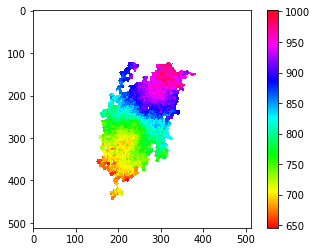

In [2]:
hdu = fits.open("data/ugc10075_rv_voro.fits")
velmap = hdu[0].data
plt.imshow(velmap,cmap="hsv",interpolation=None)
plt.colorbar()

Por lo tanto, necesitamos definir nuestra matriz de ángulos $\Psi$ con el ángulo 0 apuntando hacia abajo y aumentando en sentido horario, de modo que la mitad roja/rosada del eje mayor corresponda a 210$^\circ$, y estemos utilizando nuestro sistema de referencia en forma consistente con el sistema de referencia reportado por el observatorio. Esto le queda de tarea, pero la idea es obtener la siguiente matriz $\Psi$:
![alt text](data/Coordenada_angular.png "Title")

Si nuestra matriz $\Psi$ ya está definida como se muestra, en las operaciones para calcular $\alpha$ y $V_{cir}$ debemos utilizar $\Psi-\Psi_0$, es decir, para esta galaxia usaríamos  $\Psi-210^\circ$. Lo que estamos haciendo al restarlos es hallar la verdadera distancia angular entre cada punto y el eje mayor, que es la cantidad que realmente contiene la información sobre la transformación de las longitudes perpendiculares al eje mayor debido a la inclinación de la galaxia. 

El siguiente gráfico presenta la resta $\Psi-210^\circ$, sumando $360^\circ$ a aquellos puntos donde la resta halla dado negativo. Esto obviamente no afecta en nada por que las funciones trigonométricas quedan inalteradas al sumar $360^\circ$, solo se hizo para ayudarle a visualizar qué es lo que representa $\Psi-\Psi_0$, y por qué este debe ser el argumento usado en las transformaciones.

![alt text](data/Angulos_girados2.png "Title")

**Notas:**

* Aquí se presentan los gráficos en grados para que su interpretación sea más fácil, PERO para usarlos en las funciones trigonométricas los valores DEBEN estar en radianes

* Todo el formalismo descrito arriba debe ser seguido de forma idéntica para el mapa de flujo, el único motivo por el que $\alpha$ debe ser computado nuevamente es que la cantidad de pixeles en la imagen y en el mapa de velocidad es diferente, pero la transformación matemática es exactamente la misma por que la galaxia es una sola, su orientación en el cielo y su inclinación tienen un único valor, y esto es lo único que determina el factor de escala entre las longitudes aparentes y las longitudes verdaderas.

# Ajuste de una recta por mínimos cuadrados

Recuerde que esto es opcional, para este ejercicio pueden encontrar simplemente una recta aproximada _a ojo_.

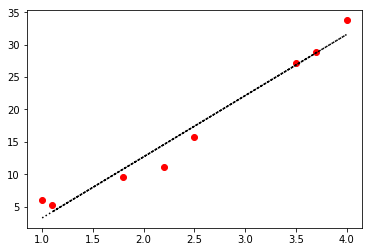

In [5]:
# Ejemplo de ajuste de una línea recta por
# mínimos cuadrados utilizando una rutina
# tipo Levenberg-Marquadt

from scipy.optimize import leastsq

x=np.array([1.0,2.5,3.5,4.0,1.1,1.8,2.2,3.7])
y=np.array([6.008,15.722,27.130,33.772,5.257,9.549,11.098,28.828])

# Modelo que deseo ajustar, en este caso una recta
def funcLine(params,x):
    return params[0]*x+params[1]

# Función de error (lo que se va a querer
# minimizar es la suma de errores cuadráticos)
def ErrorFunc(tpl,x,y):
    return funcLine(tpl,x)-y

# Valor inicial, punto de partida para el algoritmo
p0 = [10,-6]

# La función leastsq itera desde el valor inicial,
# buscando minimizar el error cuadrático
# best_params serán los parámetros del mejor modelo
best_params,success = leastsq(ErrorFunc,p0,args=(x,y))
y2 = funcLine(best_params,x)
plt.plot(x,y,"or")
plt.plot(x,y2,":k")